In [1606]:
import pandas as pd
import math 
import numpy as np
import re
import json


In [1607]:
df = pd.read_json('aptamers.json')

In [1608]:
df.head()

,name,target,category,kd,bindingCondition,temp,length,molecular weight,extinction coefficient,gc content,nmoles/OD260,μg/OD260,reference,sequence
0,HMBA (aptabeacon),6X His-tag,Protein,~4.2 nM (reported value),"1X DPBS without Ca and Mg (pH 7.1-7.5), 20 °C",N/A°C,1,12990.45 g/mole,382400 L/(mole·cm),57.14%,2.62,33.97,X Tan,"[5', {5'/5-FAM}, dCp, dAp, dGp, dGp, dTp, dTp,..."
1,IgE (4.4.12),IgE,Protein,23 nM (reported value),Binding buffer: PBS and 1 mM MgCl,(pH 8.0),78,24050.67 g/mole,753800 L/(mole·cm),47.44%,1.33,31.91,"Mendonsa, Shaun D. and Bowser, Michael T. ""","[5', dAp, dGp, dCp, dAp, dGp, dCp, dAp, dCp, d..."
2,Tumour Marker MUC1 (S1.6),Tumour Marker MUC,Peptide,0.2131 nM (reported value),Binding Buffer (0.2 M NaHCO3 and 0.5 M NaCl (...,N/A°C,72,22336.6 g/mole,737600 L/(mole·cm),48.61%,1.36,30.28,"Ferreira, C., et al. ""DNA Aptamers That Bi nd ...","[5', dGp, dGp, dGp, dAp, dGp, dAp, dCp, dAp, d..."
3,Acute myeloid leukemia cells (KH1C12),Acute myeloid leukemia cells (HL60),Cells,4.5 nM (reported value),"Binding Buffer (4.5 g/L glucose, 5 mM MgCl",", 0.1 mg/ml tRNA and 1mg/ml BSA, dissolved in ...",68,20896.62 g/mole,647700 L/(mole·cm),47.06%,1.54,32.26,"Sefah, Kwame, et al. ""Molecular recognition of...","[5', dAp, dTp, dCp, dCp, dAp, dGp, dAp, dGp, d..."
4,Human Hepatocellular carcinoma (TLS11a),Human Hepatocellular carcinoma cell line (LH86),Cells,7.16 nM (reported value),Binding buffer (PBS containing 5 mM MgCl,", 4.5 mg/mL glucose, 0.1 mg/mL yeast tRNA, 1 m...",63,19339.58 g/mole,589200 L/(mole·cm),50.79%,1.70,32.82,"Meng, L. (2012). Targeted delivery of chemothe...","[5', dAp, dCp, dAp, dGp, dCp, dAp, dTp, dCp, d..."


df

In [1609]:
df.length

0        1
1       78
2       72
3       68
4       63
      ... 
432     30
433     30
434    dTp
435     27
436    dCp
Name: length, Length: 437, dtype: object

In [1610]:
df

,name,target,category,kd,bindingCondition,temp,length,molecular weight,extinction coefficient,gc content,nmoles/OD260,μg/OD260,reference,sequence
0,HMBA (aptabeacon),6X His-tag,Protein,~4.2 nM (reported value),"1X DPBS without Ca and Mg (pH 7.1-7.5), 20 °C",N/A°C,1,12990.45 g/mole,382400 L/(mole·cm),57.14%,2.62,33.97,X Tan,"[5', {5'/5-FAM}, dCp, dAp, dGp, dGp, dTp, dTp,..."
1,IgE (4.4.12),IgE,Protein,23 nM (reported value),Binding buffer: PBS and 1 mM MgCl,(pH 8.0),78,24050.67 g/mole,753800 L/(mole·cm),47.44%,1.33,31.91,"Mendonsa, Shaun D. and Bowser, Michael T. ""","[5', dAp, dGp, dCp, dAp, dGp, dCp, dAp, dCp, d..."
2,Tumour Marker MUC1 (S1.6),Tumour Marker MUC,Peptide,0.2131 nM (reported value),Binding Buffer (0.2 M NaHCO3 and 0.5 M NaCl (...,N/A°C,72,22336.6 g/mole,737600 L/(mole·cm),48.61%,1.36,30.28,"Ferreira, C., et al. ""DNA Aptamers That Bi nd ...","[5', dGp, dGp, dGp, dAp, dGp, dAp, dCp, dAp, d..."
3,Acute myeloid leukemia cells (KH1C12),Acute myeloid leukemia cells (HL60),Cells,4.5 nM (reported value),"Binding Buffer (4.5 g/L glucose, 5 mM MgCl",", 0.1 mg/ml tRNA and 1mg/ml BSA, dissolved in ...",68,20896.62 g/mole,647700 L/(mole·cm),47.06%,1.54,32.26,"Sefah, Kwame, et al. ""Molecular recognition of...","[5', dAp, dTp, dCp, dCp, dAp, dGp, dAp, dGp, d..."
4,Human Hepatocellular carcinoma (TLS11a),Human Hepatocellular carcinoma cell line (LH86),Cells,7.16 nM (reported value),Binding buffer (PBS containing 5 mM MgCl,", 4.5 mg/mL glucose, 0.1 mg/mL yeast tRNA, 1 m...",63,19339.58 g/mole,589200 L/(mole·cm),50.79%,1.70,32.82,"Meng, L. (2012). Targeted delivery of chemothe...","[5', dAp, dCp, dAp, dGp, dCp, dAp, dTp, dCp, d..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,PFOA Aptamer,"Polyfluoroalkyl acid (Perfluorooctanoic acid, ...",Small Organic,5.5 nM (reported value),"pH 7.5 buffer (20 mM HEPES, 1 M NaCl, 10 mM Mg...",23°C,30,9488.22 g/mole,308100 L/(mole·cm),60.00%,3.25,30.80,"Park, J., Yang, K.-A., Choi, Y., & Choe, J. K....","[5', dGp, dGp, dAp, dAp, dTp, dCp, dGp, dTp, d..."
433,HD1-15dA,Thrombin,Protein,50.9 nM (reported value),In the presence of different concentrations of...,25°C,30,9424.2 g/mole,325000 L/(mole·cm),30.00%,3.08,29.00,"Müller, J., Wulffen, B., Pötzsch, B., & Mayer,...","[5', dGp, dGp, dTp, dTp, dGp, dGp, dTp, dGp, d..."
434,AMP18,Ampcillin,Small Organic,9.8 nM (reported value),The ssDNA library (500 pmol) was pre-incubated...,4°C,dTp,dTp,dGp,dGp,3',19,"Song KM, Jeong E, Jeon W, Cho M, Ban C. Aptase...","[5', dTp, dTp, dAp, dGp, dTp, dTp, dGp, dGp, d..."
435,Aptamer Beacon,adenosine,Protein,6.0 nM (reported value),"150 mmol L−1 NaCl, 1 mmol L−1 MgCl2, 5 mmol L−...",37 °C,27,8459.31 g/mole,279432 L/(mole·cm),59.26%,3.58,30.27,"Zhang JQ, Wang YS, Xue JH, He Y, Yang HX, Lian...","[5', dAp, dCp, dCp, dTp, dGp, dGp, dGp, dGp, d..."


In [1611]:
df = df[df['sequence'].str.len() != 0].reset_index(drop=True)




One-Hot Encoding Features

In [1612]:
NAME = df['name']
TARGET = df['target']
CATEGORY = df['category']


def extract_numeric_value(s):
    match = re.search(r'\d+[\d\.]*(?:\s*(?:/|\(|\)|·)\s*\d+[\d\.]*)*', str(s))
    if match:
        return match.group()
    else:
        return np.nan

#Get Kd
numeric_values = df['kd'].apply(extract_numeric_value).astype(float)
KD = pd.Series(numeric_values)

#Get molecular weight 
mol_weights = df['molecular weight'].apply(extract_numeric_value).astype(float)
MW = pd.Series(mol_weights)

#Get extinction Coefficient 
extinct = df['extinction coefficient'].apply(extract_numeric_value).astype(float)
EC = pd.Series(extinct)

#Get GC content 
gc = df['gc content'].apply(extract_numeric_value).astype(float)
GC = pd.Series(gc)

# #Get sequence  using list comprehensions
# sequence = df['sequence']
# bases = ['A', 'T', 'C', 'G']
# new_sequences = [[nuc[1] for nuc in seq if len(nuc) == 3 and nuc[1] in bases] for seq in sequence]

#Get sequence using regular expression 
# Define the regular expression pattern
pattern = re.compile(r'(?<=d)[ATCG](?=p)')
sequences = df['sequence'].apply(''.join)  #capture sequences 

# Apply the pattern to each string in sequences
new_sequences = ["".join(pattern.findall(seq)) for seq in sequences]

SEQUENCE = pd.Series(new_sequences)
SEQUENCE = SEQUENCE.apply(lambda x: ''.join(x))

REFERENCE = df['reference']


# #Construct dataframe with cleaned data 
aptamers = pd.DataFrame({'name': NAME, 'target': TARGET, 'category': CATEGORY, 'kd': KD, 'molecularWeight': MW, 'extinctCoe': EC, 'gcContent': GC, 'sequence': SEQUENCE, 'reference': REFERENCE})

#Drop any rows with empty kd 
aptamers = aptamers[aptamers['kd'].notnull()].reset_index(drop=True)
aptamers = aptamers[aptamers['molecularWeight'].notnull()].reset_index(drop=True)
aptamers

,name,target,category,kd,molecularWeight,extinctCoe,gcContent,sequence,reference
0,HMBA (aptabeacon),6X His-tag,Protein,4.2000,12990.45,382400.0,57.14,CAGGTTGGTCTGGTTGGGTTTGGCTCCTGTGTACGCAACCTG,X Tan
1,IgE (4.4.12),IgE,Protein,23.0000,24050.67,753800.0,47.44,AGCAGCACAGAGGTCAGATGTGAAACATAGCATATTTACTTATGTC...,"Mendonsa, Shaun D. and Bowser, Michael T. """
2,Tumour Marker MUC1 (S1.6),Tumour Marker MUC,Peptide,0.2131,22336.60,737600.0,48.61,GGGAGACAAGAATAAACGCTCAAGCAACAGGGTATCCAAAGGATCA...,"Ferreira, C., et al. ""DNA Aptamers That Bi nd ..."
3,Acute myeloid leukemia cells (KH1C12),Acute myeloid leukemia cells (HL60),Cells,4.5000,20896.62,647700.0,47.06,ATCCAGAGTGACGCAGCATGCCCTAGTTACTACTACTCTTTTTAGC...,"Sefah, Kwame, et al. ""Molecular recognition of..."
4,Human Hepatocellular carcinoma (TLS11a),Human Hepatocellular carcinoma cell line (LH86),Cells,7.1600,19339.58,589200.0,50.79,ACAGCATCCCCATGTGAACAATCGCATTGTGATTGTTACGGTTTCC...,"Meng, L. (2012). Targeted delivery of chemothe..."
...,...,...,...,...,...,...,...,...,...
288,Aptamer MA,methylenedioxypyrovalerone (MDPV),Small Organic,7.0000,14134.82,441918.0,47.83,CTTACGACTCAGGCATTTTGCCGGGTAACGAAGTTACTGTCGTAAG,"Haixiang Yu, Weijuan Yang, Obtin Alkhamis, Jua..."
289,CSS.1,Cortisol,Small Organic,245.0000,12881.40,395100.0,54.76,GACGACGCCCGCATGTTCCATGGATAGTCTTGACTAGTCGTC,"Niu, C., Ding, Y., Zhang, C., & Liu, J. (2022)..."
290,PFOA Aptamer,"Polyfluoroalkyl acid (Perfluorooctanoic acid, ...",Small Organic,5.5000,9488.22,308100.0,60.00,GGAATCGTGGGTGGTAGGGTAGGGGATGCA,"Park, J., Yang, K.-A., Choi, Y., & Choe, J. K...."
291,HD1-15dA,Thrombin,Protein,50.9000,9424.20,325000.0,30.00,GGTTGGTGTGGTTGGAAAAAAAAAAAAAAA,"Müller, J., Wulffen, B., Pötzsch, B., & Mayer,..."


In [1613]:
#Get secondary structure and mfe for all sequences 
import nupack

#Store structure and mfe information
struct = []
gibbs = []
# Define the sequence
for sequence in aptamers['sequence']:
    
    # Define the strand and set the nucleic acid type (use 'dna' for DNA, 'rna' for RNA)
    strand = nupack.Strand(sequence, 'my_strand', material='DNA')

    # Create a complex with the strand
    complex = nupack.Complex([strand])

    # Set the calculation options, such as temperature and model
    options = nupack.Model(material='DNA', celsius=25)

    # Compute the MFE structure
    mfe_result = nupack.mfe(complex, model=options)

    # Print the MFE structure and its energy
    structure = str(mfe_result[0].structure)
    energy = str(mfe_result[0].energy)
    struct.append(structure)
    gibbs.append(energy)

    
    
    # print(f'Sequence: {sequence}')
    # print(f'MFE Structure: {structure}')
    # print(f'MFE Energy: {energy} kcal/mol')
#Add strucure and mfe information into dataframe
aptamers['structure'] = struct
aptamers['mfe'] = gibbs

Cluster 0: ['ATCCTGTGAGGAATGCTCATGCATAGCAAGGGCT', 'TCGATTTCCTTAGTTGTCTTCCTTAGTGAG', 'CCGGCCAAGGGTGGGAGGGAGGGGGCCGG', 'AGGGACGGGCTAAGTAACTGTGGAGGGT', 'GCAGGGGCGTTCGGGGGGTACCGCTGC', 'CCTGGGGGAGTATTGCGGAGGAAGG', 'TTCTTTCTTCCCCTTGTTTGTT', 'GGTTGGTGTGGTTGG', 'GGTTGGTGTGGTTGG', 'TGTGGGGGTGGACGGGCCGGGTAGA', 'GCCTGTGGTGTTGGGGCGGGTGCG', 'AGGAAGGCTTTAGGTCTGAGATCTCGGAAT', 'GACCAGGGCAAACGGTAGGGAGTGGTC', 'AACGTGGGAGGGCGGTGGTGTTGAA', 'ATTGGGAGGGATTGGGTGGG', 'TTTAGTTGGGGTTCAGTTG', 'ATCATGGTGGGTATCGGCACTCGTTGGTTGAT', 'GCTCAACGCGGGACGGCTCTCCCATTGAC', 'CACGGCATGGTGGGCGTCGTG', 'GGTGGGGGTGG', 'GCGGGCGGTTGTATAGCGG', 'GTATTGCGGAGGAAGGTTTTTAACCTTCGGGG', 'GTTGACGGGCGATTGGTCTT', 'CGCCTGGGAAGACAACCCAGGCAGGCG', 'TGCGGTTGTAGTACTCGTGGCCG', 'GGTTGGTGTGGTTGGGGTTGGTGTGGTTGG', 'GAGACAAGGGACAAGGAG', 'GTCCAGGGTTCCAAGGTGCTTCGTGGAC', 'GCGCGGTACCGCGCTAACGGAGGTTGCGTCCGT', 'CTGTTTGGTAGGCAG', 'GTGGAGGCGGTGGCCAGTCTCGCGGTGGCGGC', 'GTGAATTGCGTTGAATTATGTTTCAGTCATCACT', 'CAGCGCCAAAGGCGGAAGC', 'ATGGCCAGGGGGGAGGGG', 'GGTTGGTGTTGTTGG

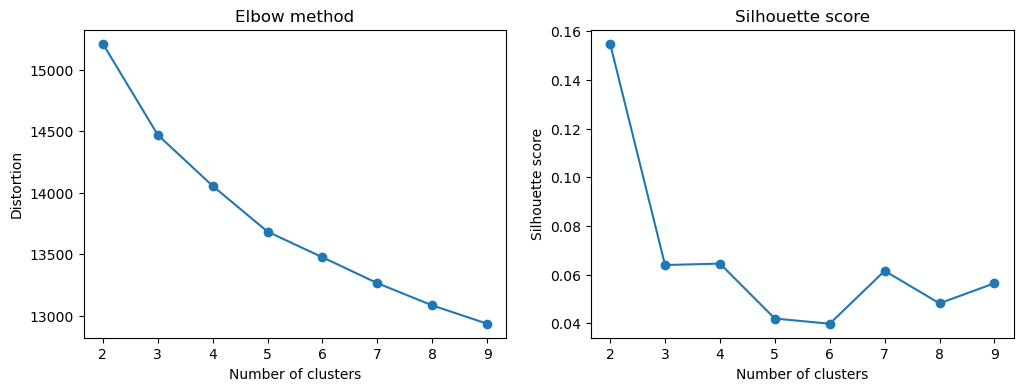

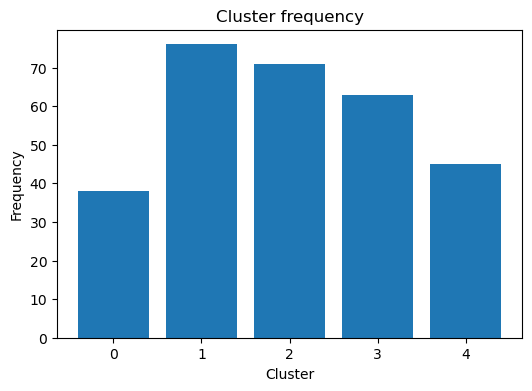

In [1614]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import os
# Define your sequences as a list of strings
sequences = aptamers['sequence'].to_list()

# Define a function to one-hot encode your sequences
def one_hot_encode(sequences):
    encoder = OneHotEncoder(categories=[['A', 'C', 'G', 'T', 'X']], sparse_output=False)
    encoded_seqs = []
    max_len = max(len(seq) for seq in sequences)
    padded_sequences = [seq.ljust(max_len, 'X') for seq in sequences]

    for seq in padded_sequences:
        encoded_seq = encoder.fit_transform(np.array(list(seq)).reshape(-1, 1))
        encoded_seqs.append(encoded_seq.flatten())

    return np.array(encoded_seqs)

# One-hot encode your sequences
encoded_sequences = one_hot_encode(sequences)

# Determine optimal number of clusters using elbow method and silhouette score
distortions = []
silhouette_scores = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0).fit(encoded_sequences)
    distortions.append(kmeans.inertia_)
    score = silhouette_score(encoded_sequences, kmeans.labels_)
    silhouette_scores.append(score)

# Plot elbow curve and silhouette score
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(range(2, 10), distortions, marker='o')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Distortion')
ax[0].set_title('Elbow method')
ax[1].plot(range(2, 10), silhouette_scores, marker='o')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Silhouette score')
ax[1].set_title('Silhouette score')

# Perform k-means clustering with Euclidean distance
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0).fit(encoded_sequences)

# Assign the sequences to clusters
clusters = {i: [] for i in range(n_clusters)}
for seq, cluster in zip(sequences, kmeans.labels_):
    clusters[cluster].append(seq)

# Print clusters
for i in range(n_clusters):
    print(f'Cluster {i}: {clusters[i]}')

# Plot frequency of clusters
cluster_sizes = [len(clusters[i]) for i in range(n_clusters)]
plt.figure(figsize=(6, 4))
plt.bar(range(n_clusters), cluster_sizes)
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Cluster frequency')
plt.show()

# Define the output directory
output_dir = './cluster_sequences'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

# Write clusters to FASTA files
for i in range(n_clusters):
    cluster_seqs = clusters[i]
    cluster_name = f'cluster_{i+1}'
    with open(f'{cluster_name}.fasta', 'w') as f:
        for j, seq in enumerate(cluster_seqs):
            f.write(f'>{cluster_name}_{j+1}\n{seq}\n')


In [1615]:
from Bio import motifs
from Bio.Seq import Seq

meme_files = ['meme_1.xml', 'meme_2.xml', 'meme_3.xml', 'meme_4.xml', 'meme_5.xml']
# Initialize a list to store the motifs from each file
all_motifs = []

# Loop through the MEME files and read the motifs
for index, file in enumerate(meme_files):
    with open(file) as f:
        meme_motifs = motifs.parse(f, 'meme')
        all_motifs.append(meme_motifs)

# Initialize lists to store the consensus sequences and PWMs
consensus_sequences = []
pwms = []

# Loop through the motifs from each MEME file
for meme_motifs in all_motifs:
    file_consensus = []
    file_pwms = []
    
    # Loop through the individual motifs
    for motif in meme_motifs:
        # Calculate the consensus sequence
        consensus = motif.consensus
        file_consensus.append(consensus)

        # Calculate the PWM
        pwm = motif.counts.normalize(pseudocounts=0.1).log_odds()
        file_pwms.append(pwm)

    
    # Add the consensus sequences and PWMs for each file to the corresponding lists
    consensus_sequences.append(file_consensus)
    pwms.append(file_pwms)

    

In [1616]:

# def one_hot_encoding(sequences):
#     encoding = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1]}
#     one_hot = [encoding[nucleotide] for nucleotide in sequences]
#     #return np.array(one_hot).reshape(len(sequences), len(sequences[0]), 4)
#     return np.array(one_hot)

# matrix = []
# for index, item in enumerate(SEQUENCE):
#     matrix.append(one_hot_encoding(item))


In [1617]:
# matrix

Physiochemical Features 

In [1618]:
# feature_vector = []
# length = df['length']
# kd = df['kd']
# buffer = df['bindingCondition']
# mw = df['molecular weight']
# extractCo = df['extinction coefficient']
# gc = df['gc content']

In [1619]:
# #Compute kd
# kd_list = []
# for item in kd.str.split(''):
#     temp = []
#     for char in item:
#         if char.isdigit() or char == '.':
#             temp.append(char)    
    
#     temp = "".join(temp)
#     kd_list.append(temp)    

# kd_list = [char for char in kd_list if len(char) > 1]

# #Convert kd values into log base 10 values 
# for index, val in enumerate(kd_list):
    
#     if not val.isdigit():
#         val = '1'
#     if len(val) > 6:
#         val = val[0:-3]
#     val = float(val)
#     kd_list[index] = math.log10(val)
# kd_vector = np.array([kd_list])

    
        

In [1620]:
# #Molecular Weight 

# mw_vector = np.array([mw])

In [1621]:
# mw_vector

In [1622]:
# #Extraction Coefficient
# extractCo = [char[0:-12] for char in extractCo]
# coefficient_vector = np.array([extractCo])

In [1623]:
# # Compute GC content
# gc_count = sum([seq.count('G') + seq.count('C') for seq in sequence])
# gc_content = gc_count/len(sequence)
# gc_vector = np.array([gc_content])
# print(gc_vector)


In [1624]:
# #Sequence Molecular Weight 
# from Bio.SeqUtils import molecular_weight
# import numpy as np

# molec_weight = []

# for seq in new_sequence:
#     mol_weight = molecular_weight(seq)
#     molec_weight.append(mol_weight)

# mol_weight_vector = np.array([molec_weight])
# print(mol_weight_vector)
# mol_weight_vector

In [1625]:
# #Extract the dot notation and free energy value 

# # Open the input file and iterate over the records
# with open('rnafold_output.txt', 'r') as f:
#     seq = f.readlines()[2::3]


# items_list = []
# for line in seq:
#     items = line.strip().split(' ')
#     nested_items = []
#     for item in items:
#         nested_item = item.split()
#         nested_items.extend(nested_item)
#     items_list.append(nested_items)


# feature_vector = []
# for item in items_list:
#     # Extract the secondary structure from the first element
#     structure = item[0]

#     # Check if the second element is non-empty and has a parentheses character at the beginning and end
#     if item[1] and item[1].startswith('(') and item[1].endswith(')'):
#         # Extract the numerical value from the second element
#         value = float(item[1].strip('()'))
#     else:
#         # Set the value to None if the second element is empty or doesn't have a parentheses character at the beginning and end
#         value = None

#     # Add the structure and value as a tuple to the feature vector
#     feature_vector.append((structure, value))






In [1626]:
feature_vector

[]

In [1627]:
# #Convert dot notation and free energy value into one-hot encoding

# # Define the set of structural elements to be included in the encoding
# structural_elements = set("'().-")

# # Create a dictionary to map each element to its position in the binary vector
# element_index = {element: index for index, element in enumerate(structural_elements)}

# # Define the length of the binary vector
# vector_length = len(structural_elements)

# # Create an empty list to store the binary vectors
# binary_vectors = []

# # Loop over each item in the feature vector and create a binary vector for each
# for item in feature_vector:
#     # Extract the secondary structure from the item
#     structure = item[0]

#     # Create a binary vector with a 1 at the position corresponding to each element present in the structure
#     binary_vector = [0] * vector_length
#     for element in structure:
#         if element in structural_elements:
#             binary_vector[element_index[element]] = 1

#     # Append the binary vector to the list of binary vectors
#     binary_vectors.append(binary_vector)


In [1628]:
binary_vectors

NameError: name 'binary_vectors' is not defined

In [ ]:

small_organic = df[df['category'] == 'Small Organic']
sequence_for_small_organic = small_organic['sequence'].reset_index(drop=True)
name = small_organic['name'].reset_index(drop=True)
target = small_organic['target'].reset_index(drop=True)


: 

In [ ]:
sequence_for_small_organic = sequence_for_small_organic.apply(''.join)

: 

In [ ]:

# count the number of occurrences of each unique value
counts = sequence_for_small_organic.value_counts()

# select values that appear more than once
duplicates = counts[counts > 1]

# print the duplicated values and their counts
for value, count in duplicates.items():
    print(f'{value} appears {count} times')

: 

In [ ]:
df = pd.DataFrame({'name': name, 'target': target, 'sequence': sequence_for_small_organic})

# convert the DataFrame to a dictionary and then to a JSON string
data = {"items": df.to_dict(orient='records')}
json_string = json.dumps(data, indent=4)
with open("output.json", "w") as outfile:
    outfile.write(json_string)

: 